# Chapter 1 - Markov Chain Monte Carlo

In [5]:
%matplotlib inline

In [53]:
import random
import math
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm, uniform

## 1.1 Generating $U$ ~ $Uniform(0, 1)$

In [13]:
U = [random.random() for i in xrange(10000)]

## 1.2 Inverse CDF Method

Inverse CDF for $Exp(\lambda)$ is:

$ F^{-1}(p;\lambda) = \frac{-ln(1-p)}{\lambda} $

In [22]:
qexp = lambda p, l: -1.*math.log(1.-p)/l

In [23]:
X = [qexp(u, 0.5) for u in U]

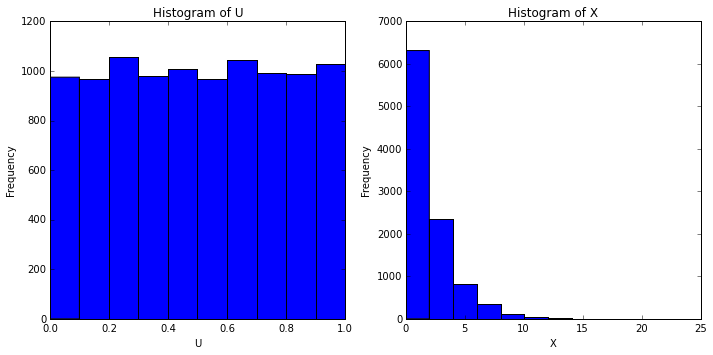

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(U)
plt.title('Histogram of U')
plt.xlabel('U')
plt.ylabel('Frequency')


plt.subplot(122)
plt.hist(X)
plt.title('Histogram of X')
plt.xlabel('X')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 1.3 Accept/Reject Algorithm
### 1.3.1 MCMC algorithm

In [38]:
df = lambda x: 0.7*norm.pdf(x, loc=2, scale=1) + 0.3*norm.pdf(x, loc=5, scale=1)

In [48]:
X = np.arange(-3, 12, 15./200)

In [49]:
density_data = zip(*[(x, df(x)) for x in X])

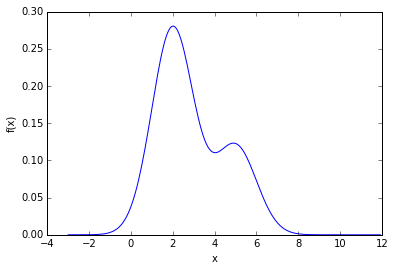

In [52]:
plt.plot(*density_data)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

In [54]:
rproposal = lambda x_i: x_i + np.random.uniform(-2., 2.)

In [55]:
x = [3]
x_star = [3]
x_star.append(rproposal(x[0]))

if (df(x_star[1]) / df(x[0])) > np.random.uniform(): 
    x.append(x_star[1])
else:
    x.append(x[0])

In [56]:
x

[3, 2.139608075720507]

In [57]:
def eval(x_prev, x_prop):
    if (df(x_prop) / df(x_prev)) > np.random.uniform(): 
        return x_prop
    return x_prev

In [80]:
x, x_star = [3], [3]
for i in xrange(10):
    x_star.append(rproposal(x[-1]))
    x.append(eval(x[-1], x_star[-1]))

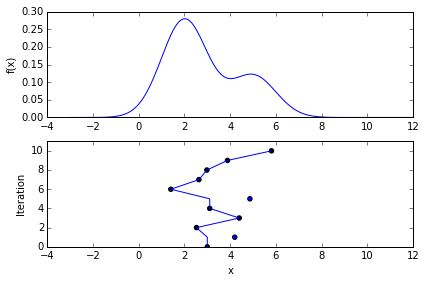

In [81]:
plt.subplot(211)
plt.plot(*density_data)
plt.xlim(-4, 12)

plt.ylabel('f(x)')

plt.subplot(212)
plt.plot(x, range(len(x)))
rejected = lambda x_a, x_p: 'black' if x_a == x_p else 'blue'
plt.scatter(x_star, range(len(x)), c=[rejected(x[i], x_star[i]) for i in range(len(x))])
plt.xlim(-4, 12)

plt.ylim(0, len(x))
plt.xlabel('x')
plt.ylabel('Iteration')
plt.tight_layout()
plt.show()

In [89]:
g_unif = lambda x_u, y_u: uniform.pdf(x_u)*uniform.pdf(y_u)/uniform.pdf(x_u)
g_norm = lambda x_u, y_u: norm.pdf(x_u)*norm.pdf(y_u)/norm.pdf(x_u)

In [109]:
def MCMC(df, start, rprop, dprop=None, N=1000):
    if dprop is None:
        dprop = lambda to, fr: 1.
    chain = [start]
    for i in xrange(N):
        x_star = rprop(chain[-1])
        r1 = df(x_star) / df(chain[-1])
        r2 = dprop(chain[-1], x_star) / dprop(x_star, chain[-1])
        if r1*r2 > np.random.uniform():
            chain.append(x_star)
        else:
            chain.append(chain[-1])
    return chain

In [110]:
chain = MCMC(df, 2, rproposal, N=1000)

In [111]:
def trace_plot(chain):
    plt.plot(chain)
    plt.ylabel('Value')
    plt.xlabel('Iteration')
    plt.show()

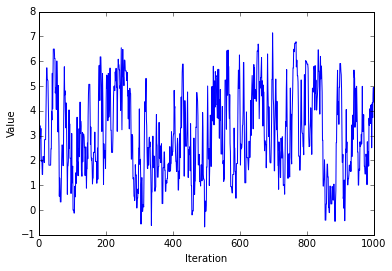

In [113]:
trace_plot(chain)

In [114]:
chain += MCMC(df, chain[-1], rproposal, N=10000)

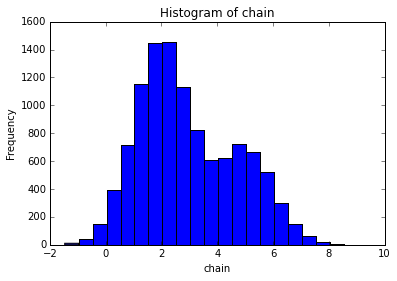

In [115]:
plt.hist(chain, bins=20)
plt.title('Histogram of chain')
plt.xlabel('chain')
plt.ylabel('Frequency')

#### With asymmetric proposal distribution

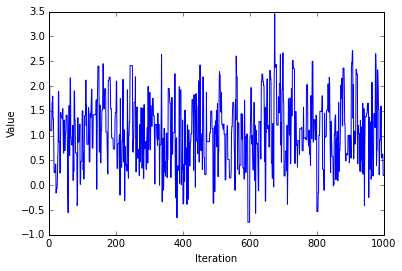

In [123]:
chain = MCMC(df, 2, rproposal, g_norm, N=1000)
trace_plot(chain)

### 1.3.2 Common problems

In [116]:
p_small = lambda x: x + np.random.uniform(-0.1, 0.1)
chain = MCMC(df, 2, p_small, N=1000)

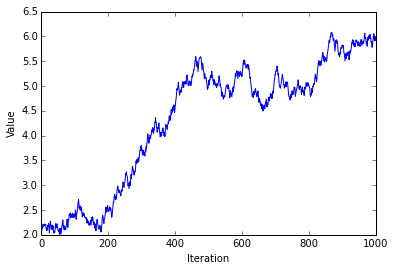

In [117]:
trace_plot(chain)

In [118]:
p_large = lambda x: x + np.random.uniform(-30., +30.)
chain = MCMC(df, 2, p_large, N=1000)

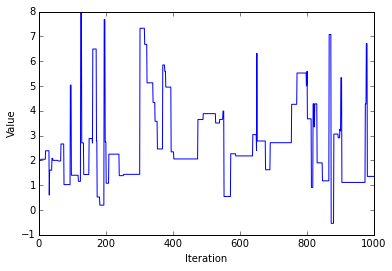

In [119]:
trace_plot(chain)

#### Burn-in

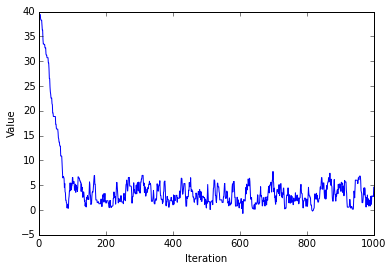

In [120]:
chain = MCMC(df, 40, rproposal, N=1000)
trace_plot(chain)

In [121]:
def trace_plots(chains):
    for chain in chains:
        plt.plot(chain)
    plt.ylabel('Value')
    plt.xlabel('Iteration')
    plt.show()

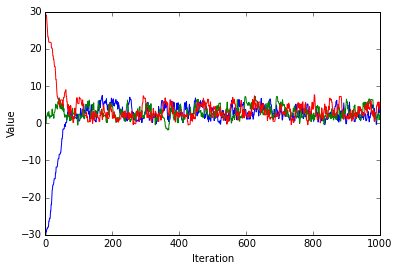

In [122]:
chain1 = MCMC(df, -30., rproposal, N=1000)
chain2 = MCMC(df, 0., rproposal, N=1000)
chain3 = MCMC(df, 30., rproposal, N=1000)
trace_plots([chain1, chain2, chain3])